In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("data/preprocessed_data.csv")
data

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,72,72,74,72.666667
1,female,group C,some college,standard,69,90,88,82.333333
2,female,group B,master's degree,standard,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,47,57,44,49.333333
4,male,group C,some college,standard,76,78,75,76.333333
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95,94.000000
996,male,group C,high school,free/reduced,62,55,55,57.333333
997,female,group C,high school,free/reduced,59,71,65,65.000000
998,female,group D,some college,standard,68,78,77,74.333333


In [31]:
X=data.drop(columns=["average_score","reading_score"])
X

,gender,race_ethnicity,parental_level_of_education,lunch,math_score,writing_score
0,female,group B,bachelor's degree,standard,72,74
1,female,group C,some college,standard,69,88
2,female,group B,master's degree,standard,90,93
3,male,group A,associate's degree,free/reduced,47,44
4,male,group C,some college,standard,76,75
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,95
996,male,group C,high school,free/reduced,62,55
997,female,group C,high school,free/reduced,59,65
998,female,group D,some college,standard,68,77


In [32]:
y=data["reading_score"].round(2)
y

0      72
1      90
2      95
3      57
4      78
       ..
995    99
996    55
997    71
998    78
999    86
Name: reading_score, Length: 1000, dtype: int64

In [33]:
hot_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, hot_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [34]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 17)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
X_train.shape, X_test.shape

((800, 17), (200, 17))

In [36]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

In [38]:
model_list = []
r2_list = []
rmse_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  

   
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

   
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(
        y_train, y_train_pred
    )

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("----------------------------------")

    print("Model performance for Test set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    print("=" * 35)
    print("\n") 

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.9583
- Mean Absolute Error: 3.1681
- R2 Score: 0.9250
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3701
- Mean Absolute Error: 3.5397
- R2 Score: 0.9156


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.2215
- Mean Absolute Error: 3.4220
- R2 Score: 0.9147
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6350
- Mean Absolute Error: 3.6941
- R2 Score: 0.9051


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.9584
- Mean Absolute Error: 3.1682
- R2 Score: 0.9250
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3651
- Mean Absolute Error: 3.5365
- R2 Score: 0.9158


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.7561
- Mean Absolute Error: 3.7590
- R2 Score: 0.8917
-----------------------

In [39]:
pd.DataFrame(
    list(zip(model_list, r2_list,rmse_list)), columns=["Model Name", "R2_Score","RSME"]
).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score,RSME
2,Ridge,0.915795,4.365130
0,Linear Regression,0.915601,4.370141
5,Random Forest Regressor,0.911233,4.481807
7,CatBoosting Regressor,0.906708,4.594610
1,Lasso,0.905059,4.635049
6,XGBRegressor,0.901922,4.711012
8,AdaBoost Regressor,0.899346,4.772456
3,K-Neighbors Regressor,0.849045,5.844553
4,Decision Tree,0.842344,5.972855


In [40]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

<Axes: xlabel='reading_score'>

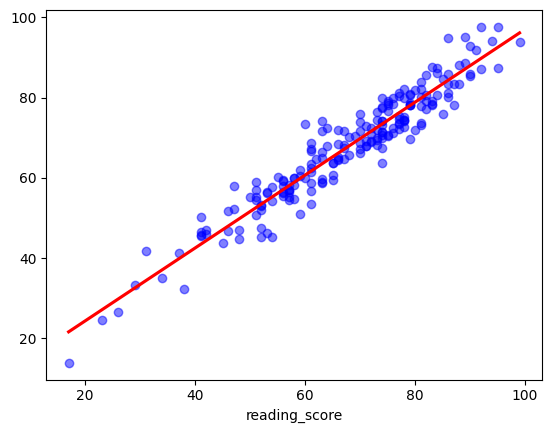

In [48]:
plt.scatter(y_test, y_pred, color="blue", alpha=.5, label="Data")
sns.regplot(
    x=y_test, y=y_pred, scatter=False, ci=None, line_kws={"color": "red"}, label="Fit"
)

In [49]:
pred_df = pd.DataFrame(
    {"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred}
)
pred_df

,Actual Value,Predicted Value,Difference
521,86,85.980986,0.019014
737,66,72.038138,-6.038138
740,73,71.995273,1.004727
660,77,74.741754,2.258246
411,83,79.081439,3.918561
...,...,...,...
408,57,58.263206,-1.263206
332,56,55.596230,0.403770
208,81,78.009857,2.990143
613,77,73.578823,3.421177
